In [1]:
import numpy as np

In [2]:
x = np.array([[18],[23],[28],[33],[38],[43],[48],[53], [58],[63]])
y = np.array([[871],[1132],[1042],[1356],[1488],[1638],[1569],[1754],[1866],[1900]])

In [3]:
x

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [4]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [6]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [8]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

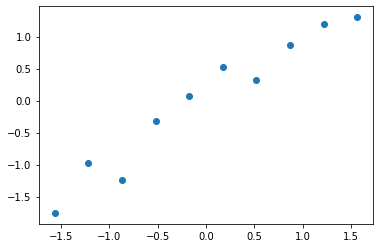

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [10]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [11]:
import tensorflow as tf

In [12]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [13]:
erro = tf.losses.mean_squared_error(y,(b0 + b1 * x))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    
    for i in range(1000):
        sess.run(treinamento)
        
    b0_final, b1_final = sess.run([b0,b1])

In [15]:
b0_final

5.235348e-09

In [16]:
b1_final

0.97118986

In [17]:
previsoes = b0_final + b1_final * x
previsoes

array([[-1.52156208],
       [-1.18343717],
       [-0.84531226],
       [-0.50718736],
       [-0.16906245],
       [ 0.16906246],
       [ 0.50718737],
       [ 0.84531227],
       [ 1.18343718],
       [ 1.52156209]])

In [18]:
type(previsoes)

numpy.ndarray

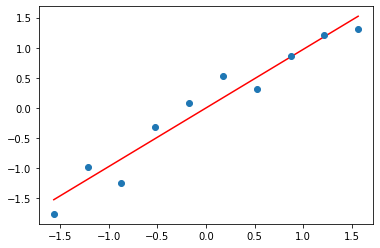

In [19]:
plt.plot(x,previsoes, color = 'red')
plt.plot(x,y, 'o')

In [20]:
scaled_value = scaler_x.transform([[40]])

In [21]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform(scaled_value))
previsao

array([[540.45380411]])

In [22]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [23]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 950.29165668],
       [1063.91573337],
       [1177.53981005],
       [1291.16388673],
       [1404.78796342],
       [1518.4120401 ],
       [1632.03611678],
       [1745.66019347],
       [1859.28427015],
       [1972.90834683]])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1,previsoes1)
mse = mean_squared_error(y1,previsoes1)

In [25]:
mae

70.1551843115013

In [26]:
mse

6412.675151741783